# Predicting Student Admissions with Neural Networks
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [67]:
# Importing pandas and numpy
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the data into a pandas DataFrame
data = pd.read_csv('student_data.csv')
# Printing out the first instances
data.head()

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [68]:
# Print the data types
print('----> Original data Type <----\n {}'.format(data.dtypes))
print('Transform the data ')
# Transform the variable "admit" to a category
data[['admit','rank']]=data[['admit','rank']].astype('category')
# Print the new data types
print('----> Transformed data Type <----\n {}'.format(data.dtypes))

----> Original data Type <----
 admit      int64
gre        int64
gpa      float64
rank       int64
dtype: object
Transform the data 
----> Transformed data Type <----
 admit    category
gre         int64
gpa       float64
rank     category
dtype: object


In [80]:
print('--> This dataset is composed by {} instances and {} features.'.format(data.shape[0],data.shape[1]-1))
print('--> There are not missing values, and the variables are in different scales!')
data.describe()

--> This dataset is composed by 400 instances and 3 features.
--> There are not missing values, and the variables are in different scales!


,gre,gpa
count,400.000000,400.000000
mean,587.700000,3.389900
std,115.516536,0.380567
min,220.000000,2.260000
25%,520.000000,3.130000
50%,580.000000,3.395000
75%,660.000000,3.670000
max,800.000000,4.000000


This is a binary classification problem, so, we need to be sure that the classes are balanced.

<div class="alert alert-block alert-info">
There is a little imbalance between the classes! Note that there are a proportion of around 2.15 instances in the negative class for each instance in the positive class.
</div>

In [79]:
# Count the number of instances by class
data['admit'].value_counts()

0    273
1    127
Name: admit, dtype: int64

## Plotting the data

First let's make a plot of our data to see how it looks.

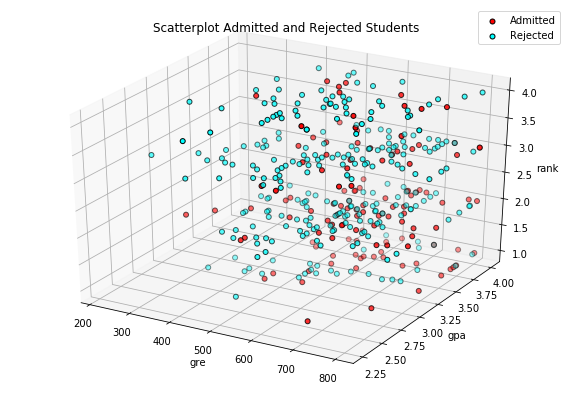

In [70]:
# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# Set the plot
fig=plt.figure(figsize=(10,7));
ax=plt.axes(projection="3d")

# Function to help us plot
admitted = data.loc[data['admit']==1,:]
rejected = data.loc[data['admit']==0,:]
ax.scatter(admitted['gre'], admitted['gpa'], admitted['rank'], s = 25, color = 'red', 
           edgecolor = 'k',label='Admitted')
ax.scatter(rejected['gre'], rejected['gpa'], rejected['rank'], s = 25, color = 'cyan', 
           edgecolor = 'k',label='Rejected')
ax.set_xlabel('gre'); ax.set_ylabel('gpa'); ax.set_zlabel('rank');
ax.legend();
ax.set_title('Scatterplot Admitted and Rejected Students');

Roughly, it looks like the students with low scores and high ranks fails to pass, but the data is not as nicely separable as we hoped it would. Maybe it would help to split the distributions considering each score, the rank and the classification.

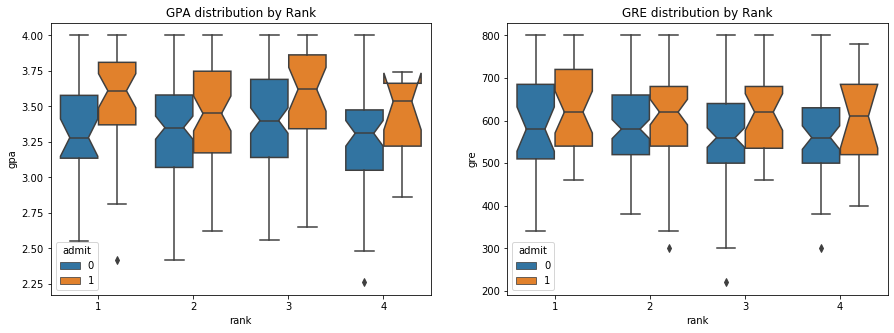

In [83]:
# Plotting the boxplot
# Create a 2 axis plot
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(x='rank',y='gpa',data=data,hue='admit',notch=True,ax=ax[0]);
sns.boxplot(x='rank',y='gre',data=data,hue='admit',notch=True,ax=ax[1]);
# Graph titles
ax[0].set_title('GPA distribution by Rank');
ax[1].set_title('GRE distribution by Rank');

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

## TODO: One-hot encoding the rank
Use the `get_dummies` function in pandas in order to one-hot encode the data.

Hint: To drop a column, it's suggested that you use `one_hot_data`[.drop( )](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html).

In [ ]:
# TODO:  Make dummy variables for rank and concat existing columns
one_hot_data = pass

# TODO: Drop the previous rank column
one_hot_data = pass

# Print the first 10 rows of our data
one_hot_data[:10]

## TODO: Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

In [ ]:
# Making a copy of our data
processed_data = one_hot_data[:]

# TODO: Scale the columns

# Printing the first 10 rows of our procesed data
processed_data[:10]

## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [ ]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.9), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

## Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

In [ ]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [ ]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# TODO: Backpropagate the error
Now it's your turn to shine. Write the error term. Remember that this is given by the equation $$ (y-\hat{y}) \sigma'(x) $$

In [ ]:
# TODO: Write the error term formula
def error_term_formula(x, y, output):
    pass

In [ ]:
# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            error_term = error_term_formula(x, y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights += learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

## Calculating the Accuracy on the Test Data

In [ ]:
# Calculate accuracy on test data
test_out = sigmoid(np.dot(features_test, weights))
predictions = test_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))